<a href="https://colab.research.google.com/github/aguilarmadeira/Optimization/blob/main/Exemplo2_MOEA/D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |     12 |             - |             -
     2 |      200 |     98 |  0.0338965284 |         ideal
     3 |      300 |     99 |  0.0031868903 |         ideal
     4 |      400 |     96 |  0.0270018766 |         ideal
     5 |      500 |     96 |  0.0068448463 |         ideal
     6 |      600 |     97 |  0.0055805728 |         ideal
     7 |      700 |     94 |  0.0094495811 |         ideal
     8 |      800 |     97 |  0.0116052289 |         nadir
     9 |      900 |     99 |  0.0032081654 |             f
    10 |     1000 |     98 |  0.0069644269 |         ideal
    11 |     1100 |     99 |  0.0447040149 |         nadir
    12 |     1200 |     99 |  0.0083179635 |         ideal
    13 |     1300 |    100 |  0.0009607130 |             f
    14 |     1400 |    100 |  0.0030836237 |         ideal
    15 |     1500 |     99 |  0.0013551681 |             f
    16 |     1600 |    100 |  0.0015480019 |            

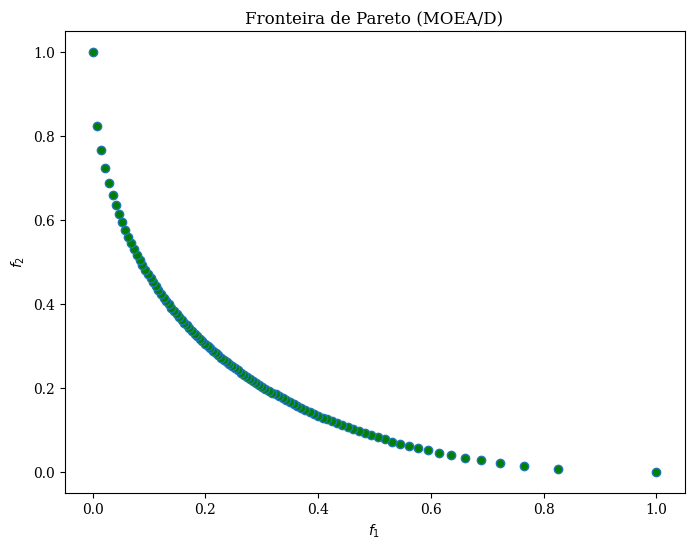

In [6]:
# Instalar pymoo se ainda não estiver instalado
!pip install pymoo

from pymoo.algorithms.moo.moead import MOEAD
from pymoo.optimize import minimize
from pymoo.core.problem import Problem
from pymoo.visualization.scatter import Scatter
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.decomposition.tchebicheff import Tchebicheff
import numpy as np

# Definir o problema multiobjetivo com penalidades para restrições
class MyProblem(Problem):
    def __init__(self):
        super().__init__(
            n_var=2,  # Número de variáveis
            n_obj=2,  # Número de funções objetivo
            xl=np.array([0, 0]),  # Limite inferior para as variáveis
            xu=np.array([1, 1])   # Limite superior para as variáveis
        )

    # Funções objetivo com penalidades
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[:, 0]**2 + x[:, 1]**2  # Primeira função objetivo
        f2 = (x[:, 0] - 1)**2 + x[:, 1]**2  # Segunda função objetivo

        # Restrições com penalidades
        penalties = np.zeros(x.shape[0])
        penalties += np.maximum(0, x[:, 0] + x[:, 1] - 1)  # g1
        penalties += np.maximum(0, x[:, 0]**2 + x[:, 1]**2 - 1)  # g2

        # Aplicar penalidades às funções objetivo
        out["F"] = np.column_stack([f1 + penalties, f2 + penalties])

# Definir direções de referência para MOEA/D
ref_dirs = get_reference_directions("uniform", n_dim=2, n_points=100)

# Configuração do MOEA/D
moead = MOEAD(
    ref_dirs=ref_dirs,  # Direções de referência
    n_neighbors=15,  # Número de vizinhos no espaço de pesos
    decomposition=Tchebicheff(),  # Método de decomposição corrigido
    prob_neighbor_mating=0.9,  # Probabilidade de cruzamento entre vizinhos
    sampling=FloatRandomSampling(),  # Amostragem inicial
    crossover=SBX(prob=0.9, eta=15),  # Tipo de cruzamento
    mutation=PM(prob=1/2, eta=20)  # Tipo de mutação
)

# Resolver o problema com MOEA/D
problem = MyProblem()
res_moead = minimize(
    problem,
    moead,
    termination=('n_gen', 100),  # Número de gerações
    verbose=True
)

# Visualizar resultados MOEA/D
print("Soluções MOEA/D na Fronteira de Pareto:")
print(res_moead.F)
scatter_moead = Scatter(title="Fronteira de Pareto (MOEA/D)")
scatter_moead.add(res_moead.F, facecolor="green")
scatter_moead.show()
